In [1]:
## import all libraries needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Introduction

To get the necessary data needed for our EDA, we first needed a webscraper. The following script below is in R, and we used it to scrape headlines for ESPN and NFl.com.

In [ ]:
#Webscraping historical articles via internetArchive and archiveRetriever package.

```{r, eval=FALSE}
install.packages("archiveRetriever", force = TRUE)
library(archiveRetriever)
```


## archive_overview allows you to check if internetarchive has captures available of a specific webpage for a range of dates. 

```{R}
library(archiveRetriever)


#check if data is available on espn's nfl page for october through december 2017
espn_overview <- archive_overview(homepage = "https://www.espn.com/nfl/",
                     startDate = "2017-10-01",
                     endDate = "2017-12-31")
```



```{r pressure, echo=FALSE}
espn_overview
```
## Once it is known that webpages are available in your desired date range retrieve_urls allows you to collect webarchive urls for each of these days to later use for webscraping. (Webarchive sometimes saves mementos more than once a day but to avoid repeated data this function will ignore multiples for a given day)
```{r}
espn_mementos <- retrieve_urls(homepage = "https://www.espn.com/nfl/",
                     startDate = "2017-10-01",
                     endDate = "2017-10-10")

espn_mementos[1:10]
```
```{r}

#This will show you the sub-pages urls for a given website such as espn.com
espn_links <- retrieve_links(ArchiveUrls = "https://web.archive.org/web/20201003005130/https://www.espn.com/", ignoreErrors = TRUE)

head(espn_links)
```
##This is the main function of archiveRetriever. scrape_urls takes the urls collected earlier with the retrieve urls function then you need to specify the path of the website object you want to take data from (it takes xpaths as the defualt) in this case I gave it a headline object. 
```{r}
espn_headline <- scrape_urls(c(Urls =espn_mementos),
paths <- c(
  headlines = '//*[@id="main-container"]/div/section[3]/div[1]/section/ul/li[1]/a'
  
),

archiveDate = TRUE,

  
  
  
)


```


```{r}
head(espn_headline,10)
```
##notice it doesn't always find anything in the location specified so there are sometimes gaps. But if it misses 10 in a row it will stop so you can fix it.
```{r}
my_df <- as.data.frame(espn_headline)
```
```{r}
View(my_df)
```
```{r}
#write.csv(my_df, "~/R_files\\sample_headlines_espn1.csv", row.names=FALSE)

This allowed us to get a good amount of data shown below:

In [2]:
df = pd.read_csv("sorted_df_w_out_teams.csv")
df

Urls  \
0     http://web.archive.org/web/20170902013843/http...   
1     http://web.archive.org/web/20170904022536/http...   
2     http://web.archive.org/web/20170908045356/http...   
3     http://web.archive.org/web/20170913000204/http...   
4     http://web.archive.org/web/20170914001848/http...   
...                                                 ...   
4113  http://web.archive.org/web/20220213012900/http...   
4114  http://web.archive.org/web/20220213012900/http...   
4115  http://web.archive.org/web/20220213012900/http...   
4116  http://web.archive.org/web/20220213012900/http...   
4117  http://web.archive.org/web/20220213012900/http...   

                                              headlines archiveDate  \
0         Sources: Browns boot Osweiler as part of cuts    9/2/2017   
1        Bucs deal Wilcox to Steelers after adding Ward    9/4/2017   
2            Patriots' Amendola leaves with head injury    9/8/2017   
3            Cards re-sign CJ2K with Johnson out months   9/13/2017   
4           Texans' Cushing suspended 10 games for PEDs   9/14/2017   
...                                                 ...         ...   
4113    Sources: Broncos to hire Morgan St. HC Wheatley   2/13/2022   
4114     OBJ hopes to come through for Rams - and Drake   2/13/2022   
4115  Dolphins to retain Boyer as defensive coordinator   2/13/2022   
4116   'Mattress Mack' bets big again on Bengals to win   2/13/2022   
4117   Fins' McDaniel: 'Extremely proud' to be biracial   2/13/2022   

               master_term  
0         Cleveland Browns  
1     Tampa Bay Buccaneers  
2     New England Patriots  
3        Arizona Cardinals  
4           Houston Texans  
...                    ...  
4113        Denver Broncos  
4114      Los Angeles Rams  
4115        Miami Dolphins  
4116    Cincinnati Bengals  
4117        Miami Dolphins  

[4118 rows x 4 columns]

We then performed sentiment analysis, after cleaning up the NA's and duplicate headlines, by using a pretraind model to obtain a score for the teams per headline as shown below. The sentiment was scored from a -1 to +1 basis, with -1 being negative, and +1 being positive. 

In [3]:
sentiment = pd.read_csv("df_scored_9.csv")
sentiment

Unnamed: 0.1  Unnamed: 0 archiveDate  \
0                0        19.0   8/20/2017   
1                1        20.0   8/20/2017   
2                2        21.0   8/20/2017   
3                3        22.0   8/20/2017   
4                4        23.0   8/20/2017   
...            ...         ...         ...   
5365          7041         NaN   2/12/2022   
5366          7042         NaN   2/12/2022   
5367          7043         NaN   2/12/2022   
5368          7044         NaN   2/13/2022   
5369          7045         NaN   2/13/2022   

                                                   Urls  \
0     http://web.archive.org/web/20170820000936/http...   
1     http://web.archive.org/web/20170820000936/http...   
2     http://web.archive.org/web/20170820000936/http...   
3     http://web.archive.org/web/20170820000936/http...   
4     http://web.archive.org/web/20170820000936/http...   
...                                                 ...   
5365  http://web.archive.org/web/20220212034752/http...   
5366  http://web.archive.org/web/20220212034752/http...   
5367  http://web.archive.org/web/20220212034752/http...   
5368  http://web.archive.org/web/20220213012900/http...   
5369  http://web.archive.org/web/20220213012900/http...   

                                              headlines                  team  \
0     Jags must make QB change; Cutler could have ca...  Jacksonville Jaguars   
1        How Texans' D has evolved under Crennel Vrabel        Houston Texans   
2     Cutler's debut proves he's in control of Dolph...        Miami Dolphins   
3       Raiders' Sean Smith charged with felony assault     Las Vegas Raiders   
4              Making sense of the Patriots fantasy RBs  New England Patriots   
...                                                 ...                   ...   
5365  Dolphins to retain Boyer as defensive coordinator        Miami Dolphins   
5366   'Mattress Mack' bets big again on Bengals to win    Cincinnati Bengals   
5367   Fins' McDaniel: 'Extremely proud' to be biracial        Miami Dolphins   
5368    Sources: Broncos to hire Morgan St. HC Wheatley        Denver Broncos   
5369     OBJ hopes to come through for Rams - and Drake      Los Angeles Rams   

      total_score  
0        0.023380  
1        0.848871  
2        0.996091  
3       -0.629718  
4        0.089151  
...           ...  
5365     0.777284  
5366     0.608361  
5367     0.992159  
5368     0.767140  
5369     0.883872  

[5370 rows x 7 columns]

# Some Simple Data Visualizations for a Sense of the Data

With this data we have obtained, we first made some simple graphs to get a better sense of what we are working with. To do so, we decided to do a quick bar chart of the total_sentiment per year from 2017-2022. Afterwards, we did a linear regression plot for each year, looking at the relationship between the amount of times a team is mentioned and its total sentiment score. 

To do this, since the data was already cleaned from before, all we had to do was work with the data to get the results we wanted. We used groupby to get the total sentiment score per team, and shown below are the results

In [4]:
## create a copy for simplicity
sentiment_df = sentiment.copy()
## turn into datetime for easier sorting of years
sentiment_df['archiveDate']= pd.to_datetime(sentiment_df['archiveDate'])
## also drop unnecceary columns
sentiment_drop = sentiment_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [5]:
## scores per team by year
## 2017
start_date = '2017-1-01'
end_date = '2017-12-31'

mask = (sentiment_drop['archiveDate'] >= start_date) & (sentiment_drop['archiveDate'] <= end_date)
sentiment_2017 = sentiment_drop.loc[mask]

## 2018
start_date1 = '2018-1-01'
end_date1 = '2018-12-31'

mask1 = (sentiment_drop['archiveDate'] >= start_date1) & (sentiment_drop['archiveDate'] <= end_date1)
sentiment_2018 = sentiment_drop.loc[mask1]

## 2019
start_date2 = '2019-1-01'
end_date2 = '2019-12-31'

mask2 = (sentiment_drop['archiveDate'] >= start_date2) & (sentiment_drop['archiveDate'] <= end_date2)
sentiment_2019 = sentiment_drop.loc[mask2]

## 2020
start_date3 = '2020-1-01'
end_date3 = '2020-12-31'

mask3 = (sentiment_drop['archiveDate'] >= start_date3) & (sentiment_drop['archiveDate'] <= end_date3)
sentiment_2020 = sentiment_drop.loc[mask3]

## 2021
start_date4 = '2021-1-01'
end_date4 = '2021-12-31'

mask4 = (sentiment_drop['archiveDate'] >= start_date4) & (sentiment_drop['archiveDate'] <= end_date4)
sentiment_2021 = sentiment_drop.loc[mask4]

## 2022
start_date5 = '2022-1-01'
end_date5 = '2022-12-31'

mask5 = (sentiment_drop['archiveDate'] >= start_date5) & (sentiment_drop['archiveDate'] <= end_date5)
sentiment_2022 = sentiment_drop.loc[mask5]

In [6]:
## group by team to get overall score
sentiment_group_2017 = sentiment_2017.groupby('team').sum()
sentiment_group_2018 = sentiment_2018.groupby('team').sum()
sentiment_group_2019 = sentiment_2019.groupby('team').sum()
sentiment_group_2020 = sentiment_2020.groupby('team').sum()
sentiment_group_2021 = sentiment_2021.groupby('team').sum()
sentiment_group_2022 = sentiment_2022.groupby('team').sum()

## Total Sentiment Score for All NFL Teams

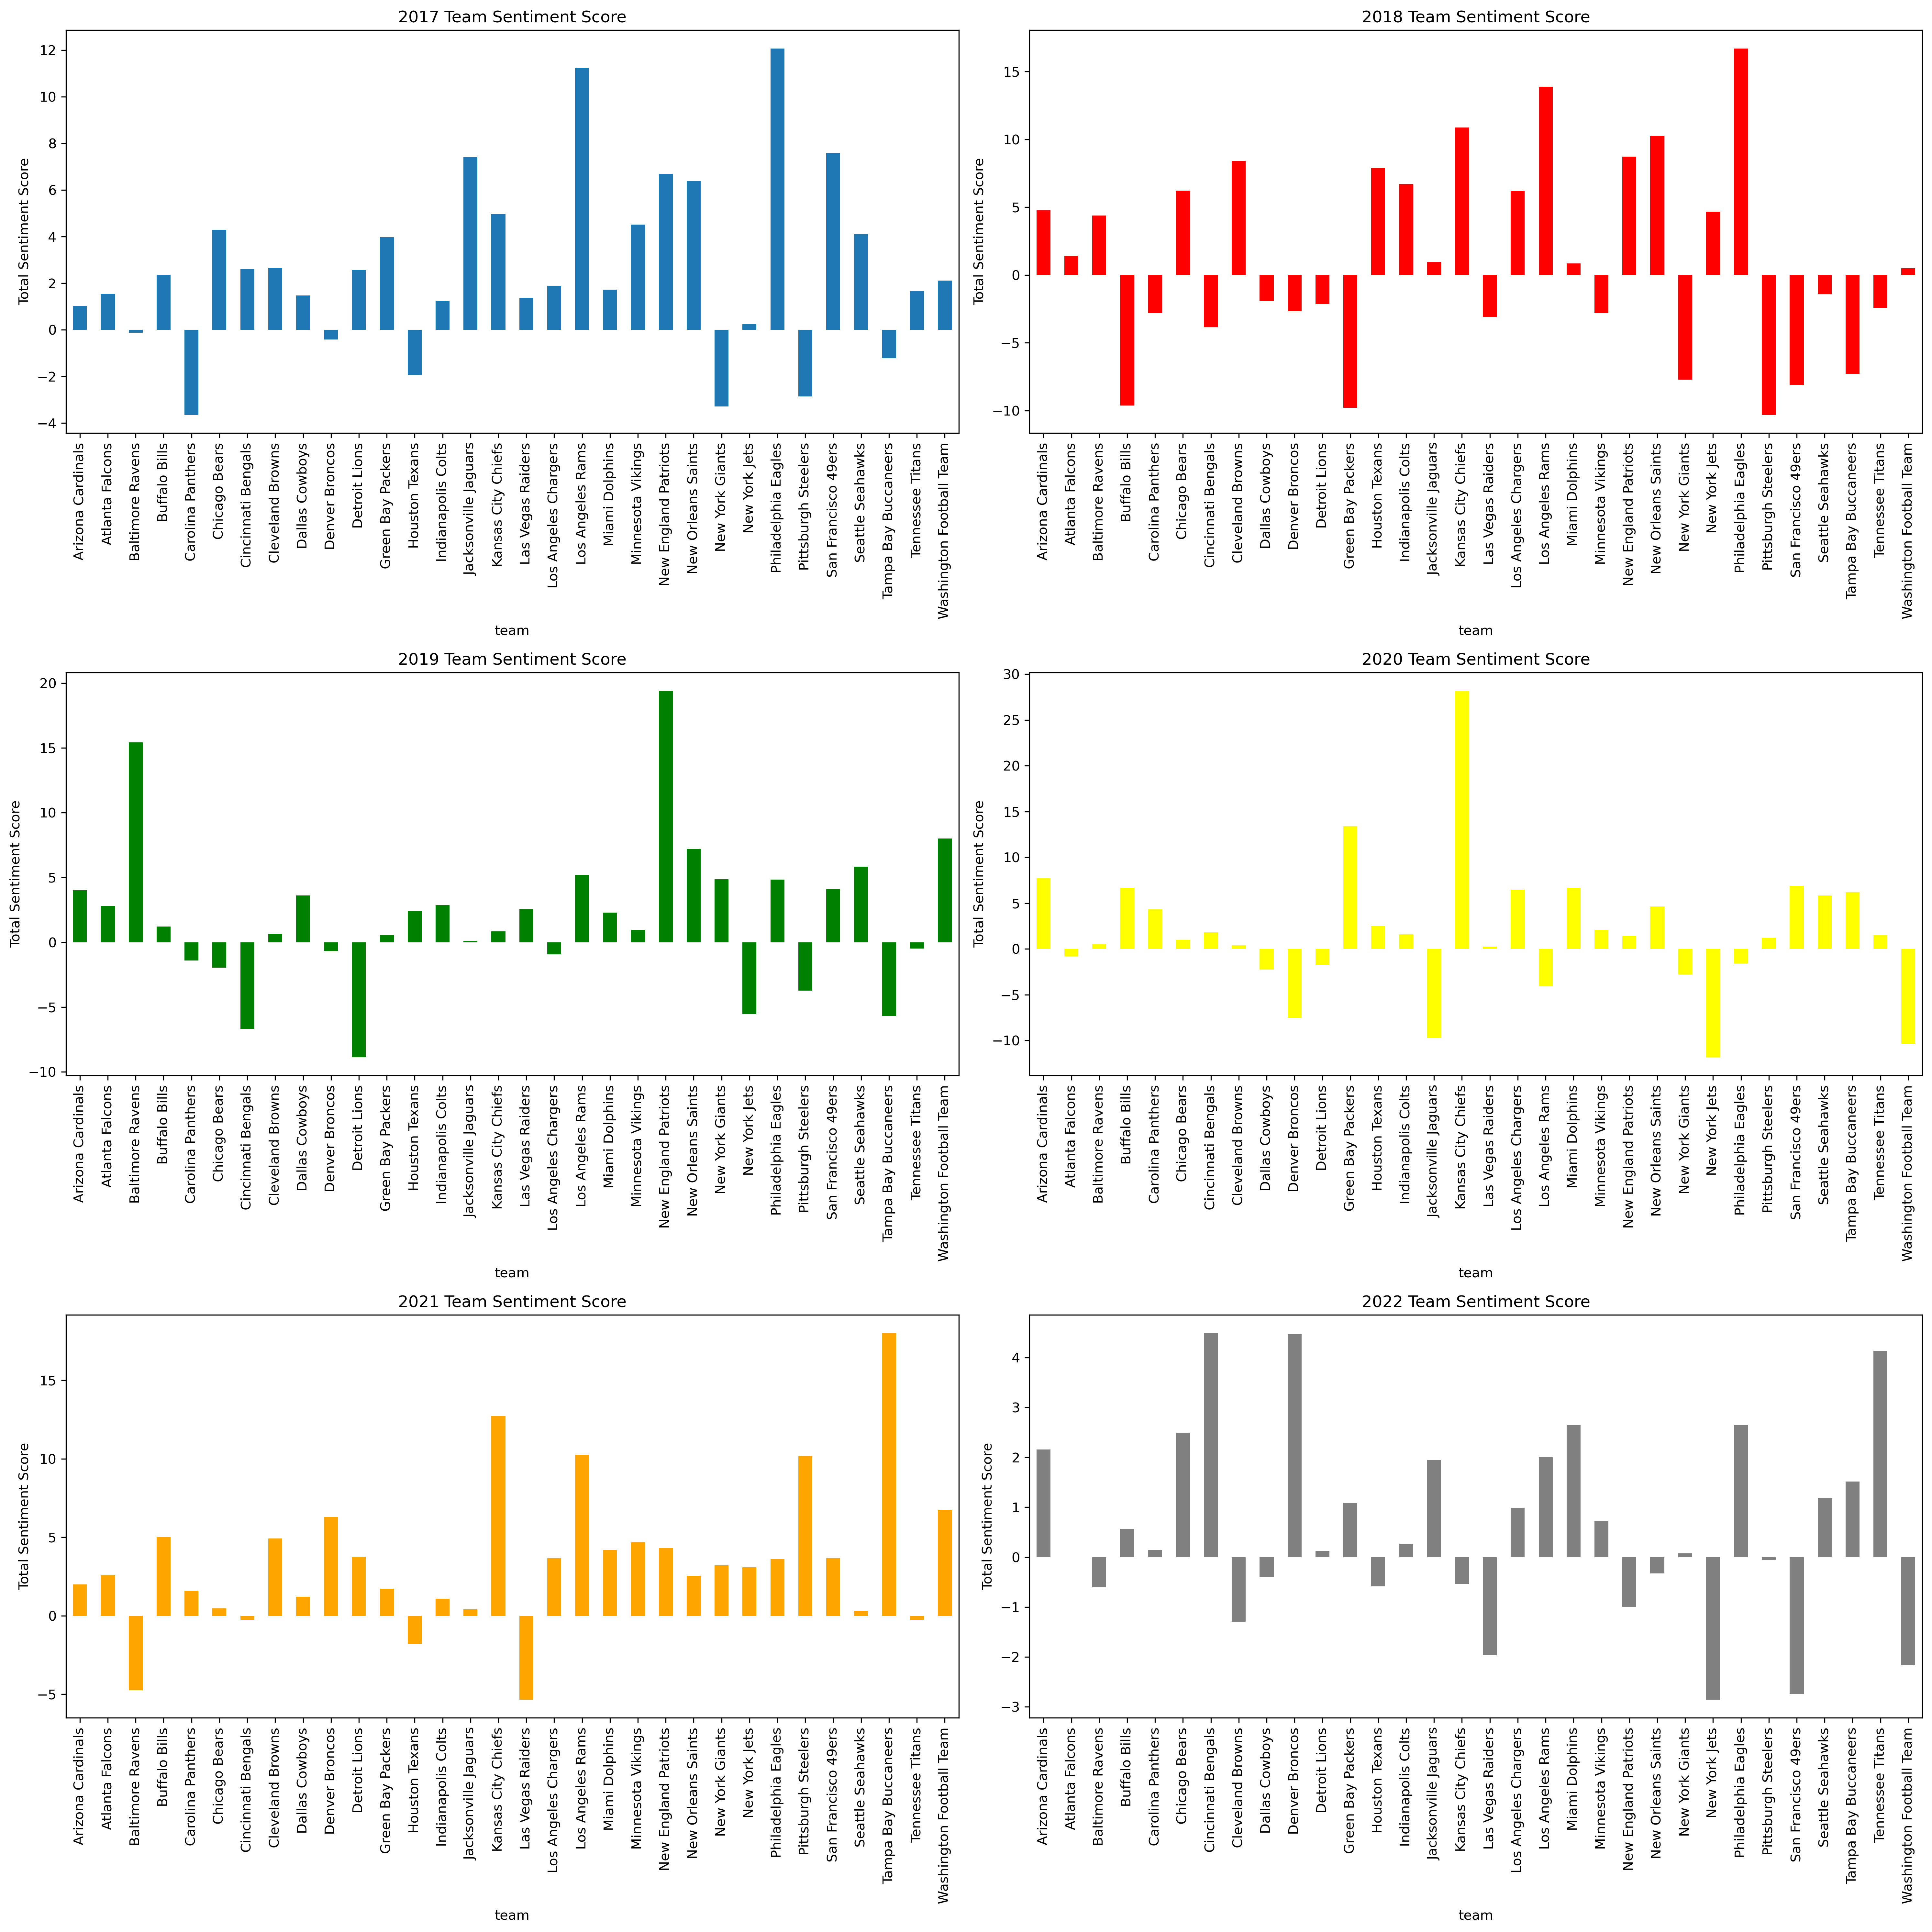

In [7]:
## team by sentiment score - totalled

fig, axs = plt.subplots(3, 2, figsize = (20,20), dpi = 300)

## 2017
sentiment_group_2017.plot.bar(ax = axs[0,0], title = '2017 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              legend = False)

## 2018
sentiment_group_2018.plot.bar(ax = axs[0,1], title = '2018 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                             color = 'red', legend = False)

## 2019
sentiment_group_2019.plot.bar(ax = axs[1,0], title = '2019 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'green' , legend = False)

## 2020
sentiment_group_2020.plot.bar(ax = axs[1,1], title = '2020 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'yellow' , legend = False)

## 2021
sentiment_group_2021.plot.bar(ax = axs[2,0], title = '2021 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'orange' , legend = False)

## 2022
sentiment_group_2022.plot.bar(ax = axs[2,1],  title = '2022 Team Sentiment Score', ylabel = 'Total Sentiment Score', 
                              color = 'grey' , legend = False)

plt.tight_layout()

As you can see from these simple bar charts, some teams had overwhelmeingly more positive sentiment headlines than other teams in a year. Some teams also had lots of negative headlines in some years. However, this might not be a comprehensive look at the overall sentiment as some teams may be mentioned more than others. This is why we also decided to look at the amount of times a team is mentioned and count those up to obtain deeper insight into what is really going on, and then do a simple linear regression to see if there is a relationship there.

# Sentiment Score and the Amount of Times Mentioned

Here, we got the counts of the number of times a team is mentioned in a given year, and combined it with the total sentiment score to get a better view. These bar plots give a better sense of what is going on, as we can see the sentiment score per times mentioned below:

In [8]:
## copies of everything just in case
sentiment_group_2017_copy = sentiment_group_2017.copy()
sentiment_group_2018_copy = sentiment_group_2018.copy()
sentiment_group_2019_copy = sentiment_group_2019.copy()
sentiment_group_2020_copy = sentiment_group_2020.copy()
sentiment_group_2021_copy = sentiment_group_2021.copy()
sentiment_group_2022_copy = sentiment_group_2022.copy()

In [9]:
## counts per year
count_2017 = sentiment_2017['team'].value_counts(sort = False)
count_2018 = sentiment_2018['team'].value_counts(sort = False)
count_2019 = sentiment_2019['team'].value_counts(sort = False)
count_2020 = sentiment_2020['team'].value_counts(sort = False)
count_2021 = sentiment_2021['team'].value_counts(sort = False)
count_2022 = sentiment_2022['team'].value_counts(sort = False)

In [10]:
## add the counts in 
sentiment_group_2017_copy['counts'] = count_2017.reindex(sentiment_group_2017_copy.index)
sentiment_group_2018_copy['counts'] = count_2018.reindex(sentiment_group_2018_copy.index)
sentiment_group_2019_copy['counts'] = count_2019.reindex(sentiment_group_2019_copy.index)
sentiment_group_2020_copy['counts'] = count_2020.reindex(sentiment_group_2020_copy.index)
sentiment_group_2021_copy['counts'] = count_2021.reindex(sentiment_group_2021_copy.index)
sentiment_group_2022_copy['counts'] = count_2022.reindex(sentiment_group_2022_copy.index)

In [11]:
## get a more comprehensive look 
sentiment_group_2017_copy['sentiment_per_count'] = sentiment_group_2017_copy['total_score'] / sentiment_group_2017_copy['counts']
sentiment_group_2018_copy['sentiment_per_count'] = sentiment_group_2018_copy['total_score'] / sentiment_group_2018_copy['counts']
sentiment_group_2019_copy['sentiment_per_count'] = sentiment_group_2019_copy['total_score'] / sentiment_group_2019_copy['counts']
sentiment_group_2020_copy['sentiment_per_count'] = sentiment_group_2020_copy['total_score'] / sentiment_group_2020_copy['counts']
sentiment_group_2021_copy['sentiment_per_count'] = sentiment_group_2021_copy['total_score'] / sentiment_group_2021_copy['counts']
sentiment_group_2022_copy['sentiment_per_count'] = sentiment_group_2022_copy['total_score'] / sentiment_group_2022_copy['counts']

In [12]:
## drop for simplicity 
sentiment_group_2017_copy_drop = sentiment_group_2017_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2018_copy_drop = sentiment_group_2018_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2019_copy_drop = sentiment_group_2019_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2020_copy_drop = sentiment_group_2020_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2021_copy_drop = sentiment_group_2021_copy.drop(['total_score', 'counts'], axis = 1)
sentiment_group_2022_copy_drop = sentiment_group_2022_copy.drop(['total_score', 'counts'], axis = 1)

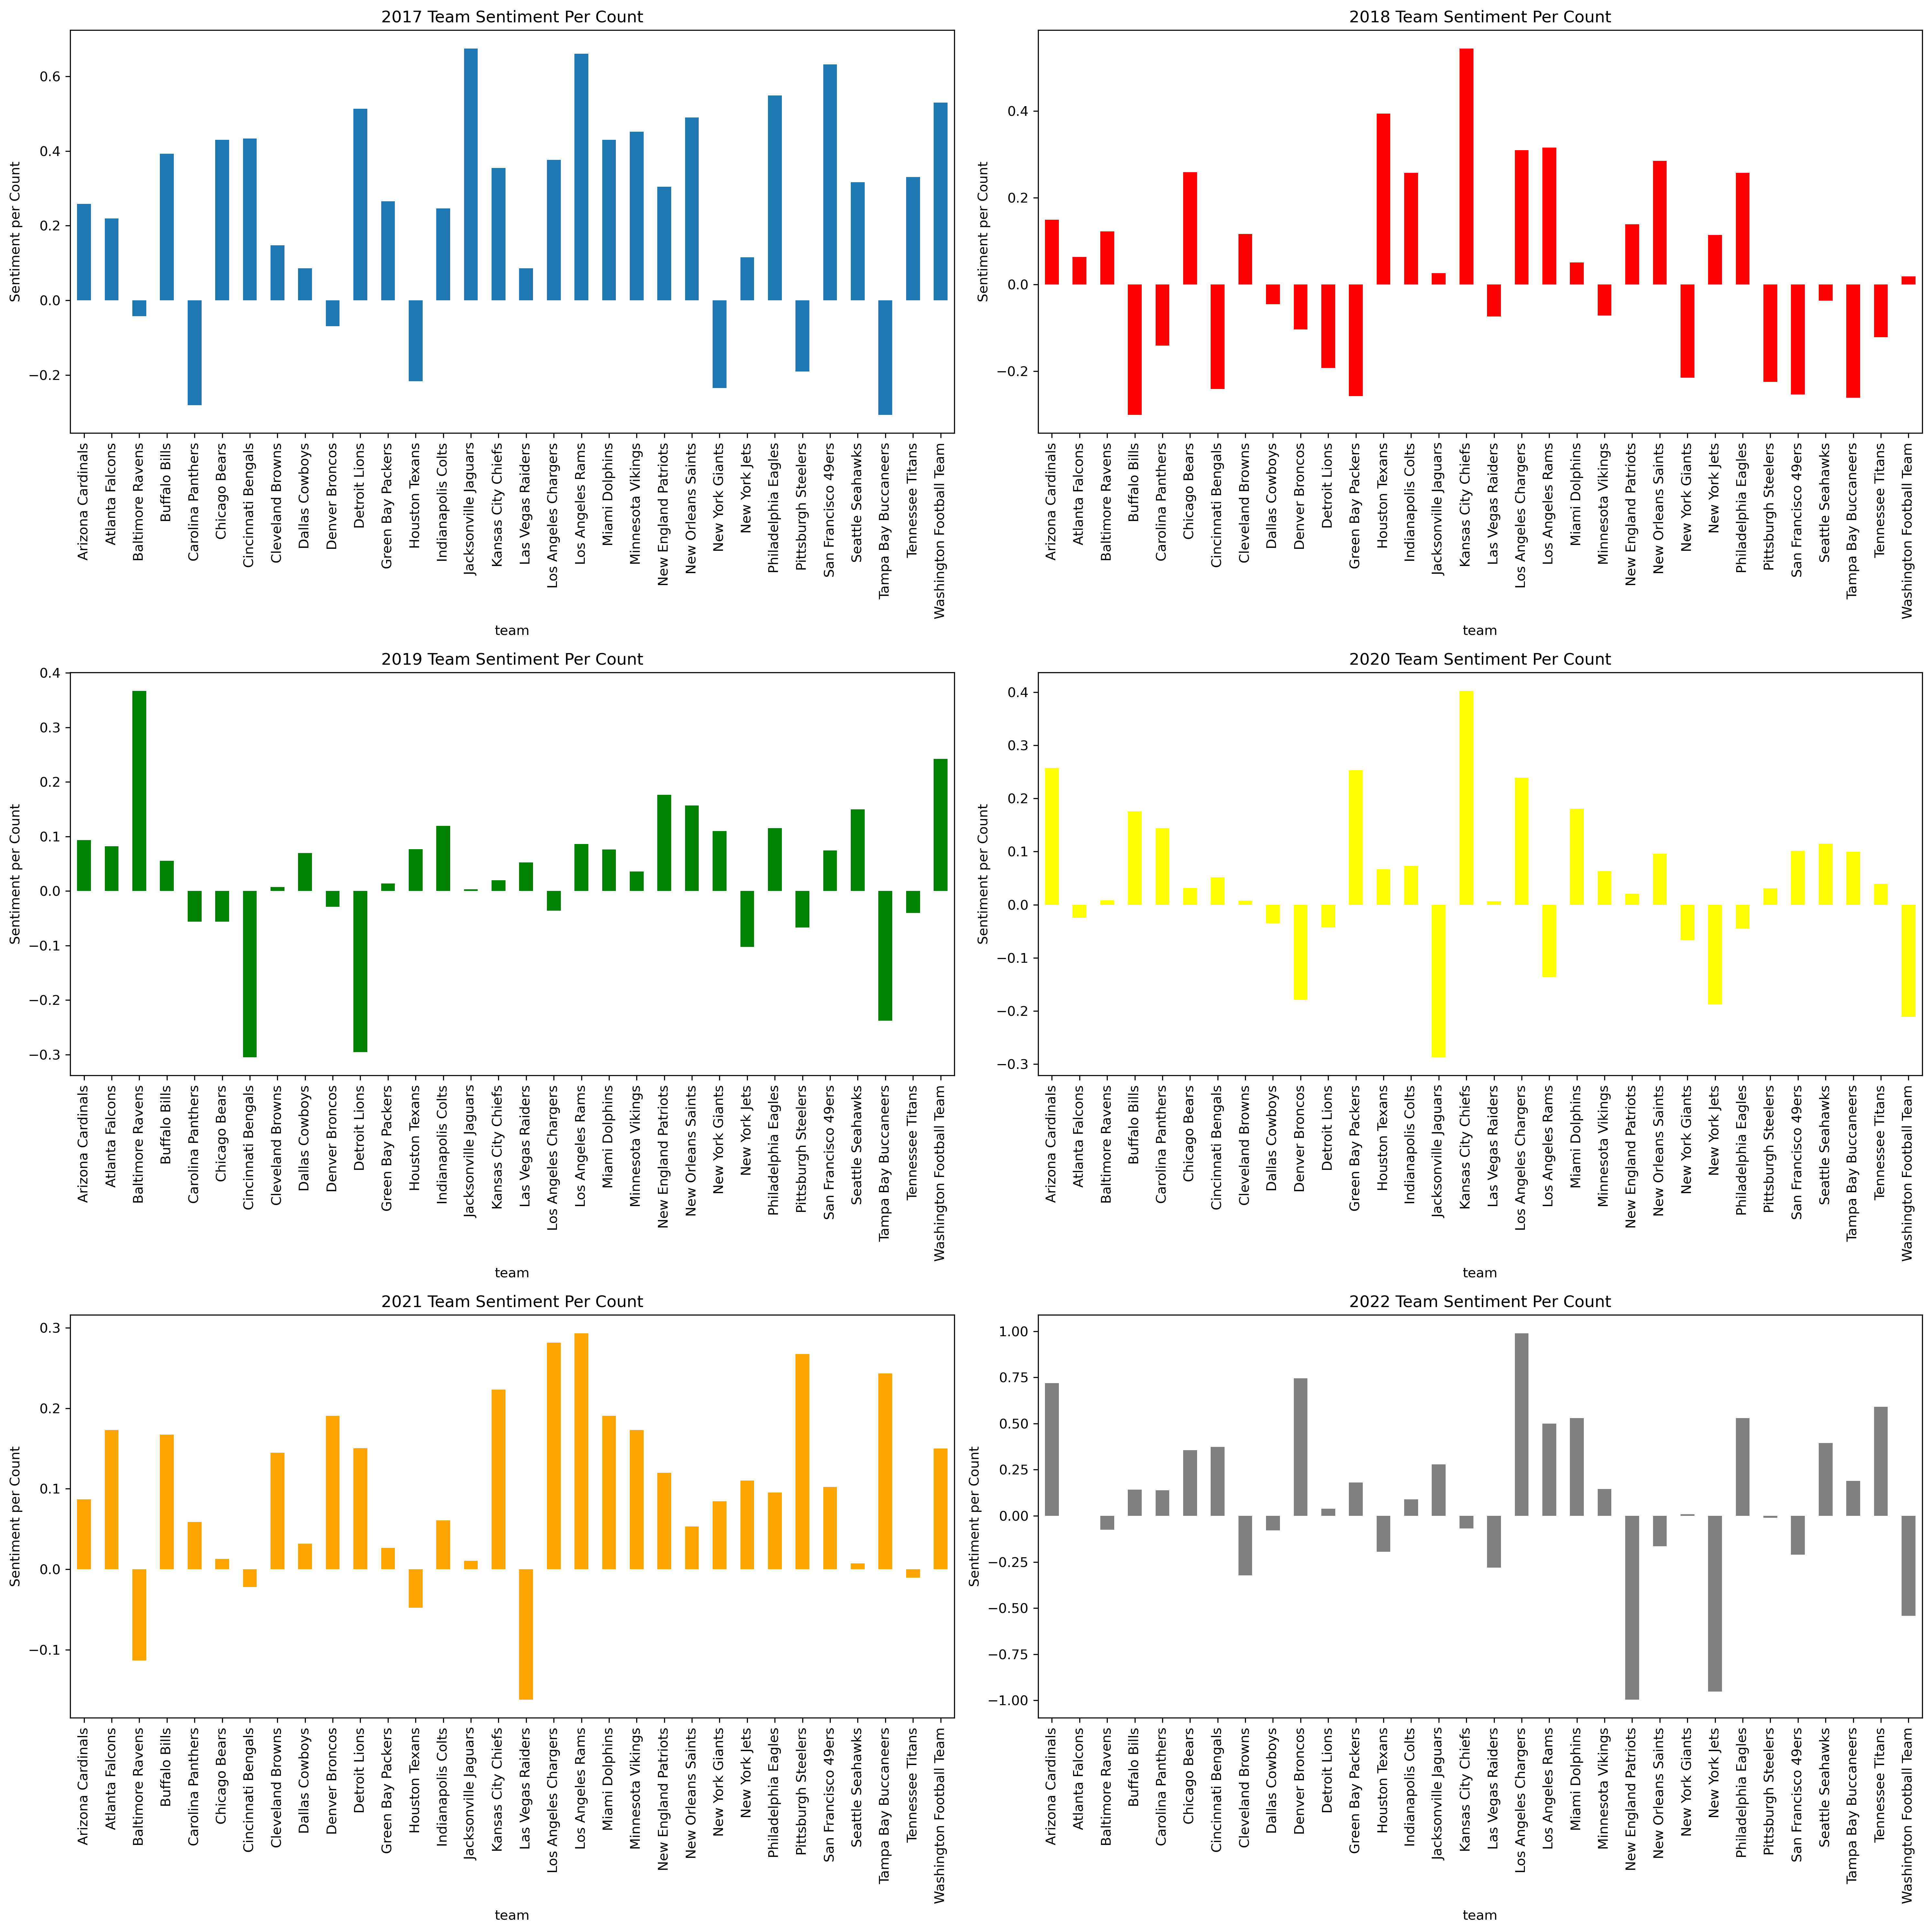

In [13]:
## team by sentiment score per count

fig, axs = plt.subplots(3, 2, figsize = (20,20), dpi = 300)

## 2017
sentiment_group_2017_copy_drop.plot.bar(ax = axs[0,0], title = '2017 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              legend = False)

## 2018
sentiment_group_2018_copy_drop.plot.bar(ax = axs[0,1], title = '2018 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                             color = 'red', legend = False)

## 2019
sentiment_group_2019_copy_drop.plot.bar(ax = axs[1,0], title = '2019 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'green' , legend = False)

## 2020
sentiment_group_2020_copy_drop.plot.bar(ax = axs[1,1], title = '2020 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'yellow' , legend = False)

## 2021
sentiment_group_2021_copy_drop.plot.bar(ax = axs[2,0], title = '2021 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'orange' , legend = False)

## 2022
sentiment_group_2022_copy_drop.plot.bar(ax = axs[2,1],  title = '2022 Team Sentiment Per Count', ylabel = 'Sentiment per Count', 
                              color = 'grey' , legend = False)

plt.tight_layout()

As you can see, this gives us a better sense of the sentiment per count mentioned.

# Linear Regression Analyis for Times Mentioned and Total Sentiment

Finally, we did a simple linear regression to see if there's a relationship between the counts and the sentiment. Below is what we obtained

In [14]:
## 2017 linear regression
X = sentiment_group_2017_copy['counts'].to_numpy().reshape(-1,1)
y = sentiment_group_2017_copy['total_score'].to_numpy()

model = LinearRegression().fit(X,y)
y_pred = model.predict(X)

## 2018
X1 = sentiment_group_2018_copy['counts'].to_numpy().reshape(-1,1)
y1 = sentiment_group_2018_copy['total_score'].to_numpy()

model1 = LinearRegression().fit(X1,y1)
y_pred1 = model1.predict(X1)

## 2019
X2 = sentiment_group_2019_copy['counts'].to_numpy().reshape(-1,1)
y2 = sentiment_group_2019_copy['total_score'].to_numpy()

model2 = LinearRegression().fit(X2,y2)
y_pred2 = model2.predict(X2)

## 2020
X3 = sentiment_group_2020_copy['counts'].to_numpy().reshape(-1,1)
y3 = sentiment_group_2020_copy['total_score'].to_numpy()

model3 = LinearRegression().fit(X3,y3)
y_pred3 = model3.predict(X3)

## 2021
X4 = sentiment_group_2021_copy['counts'].to_numpy().reshape(-1,1)
y4 = sentiment_group_2021_copy['total_score'].to_numpy()

model4 = LinearRegression().fit(X4,y4)
y_pred4 = model4.predict(X4)

## 2022
X5 = sentiment_group_2022_copy['counts'].to_numpy().reshape(-1,1)
y5 = sentiment_group_2022_copy['total_score'].to_numpy()

model5 = LinearRegression().fit(X5,y5)
y_pred5 = model5.predict(X5)

In [15]:
## linear regression between count of headlines and sentiment

print(model.coef_, model.intercept_)
print(model1.coef_, model1.intercept_)
print(model2.coef_, model2.intercept_)
print(model3.coef_, model3.intercept_)
print(model4.coef_, model4.intercept_)
print(model5.coef_, model5.intercept_)

[0.29631096] -0.397791493739045
[0.13635089] -3.382309313402705
[0.15178281] -4.162598552204124
[0.10628616] -2.846476677365956
[0.14537824] -1.5948071587638397
[0.10422961] 0.06727617325491975


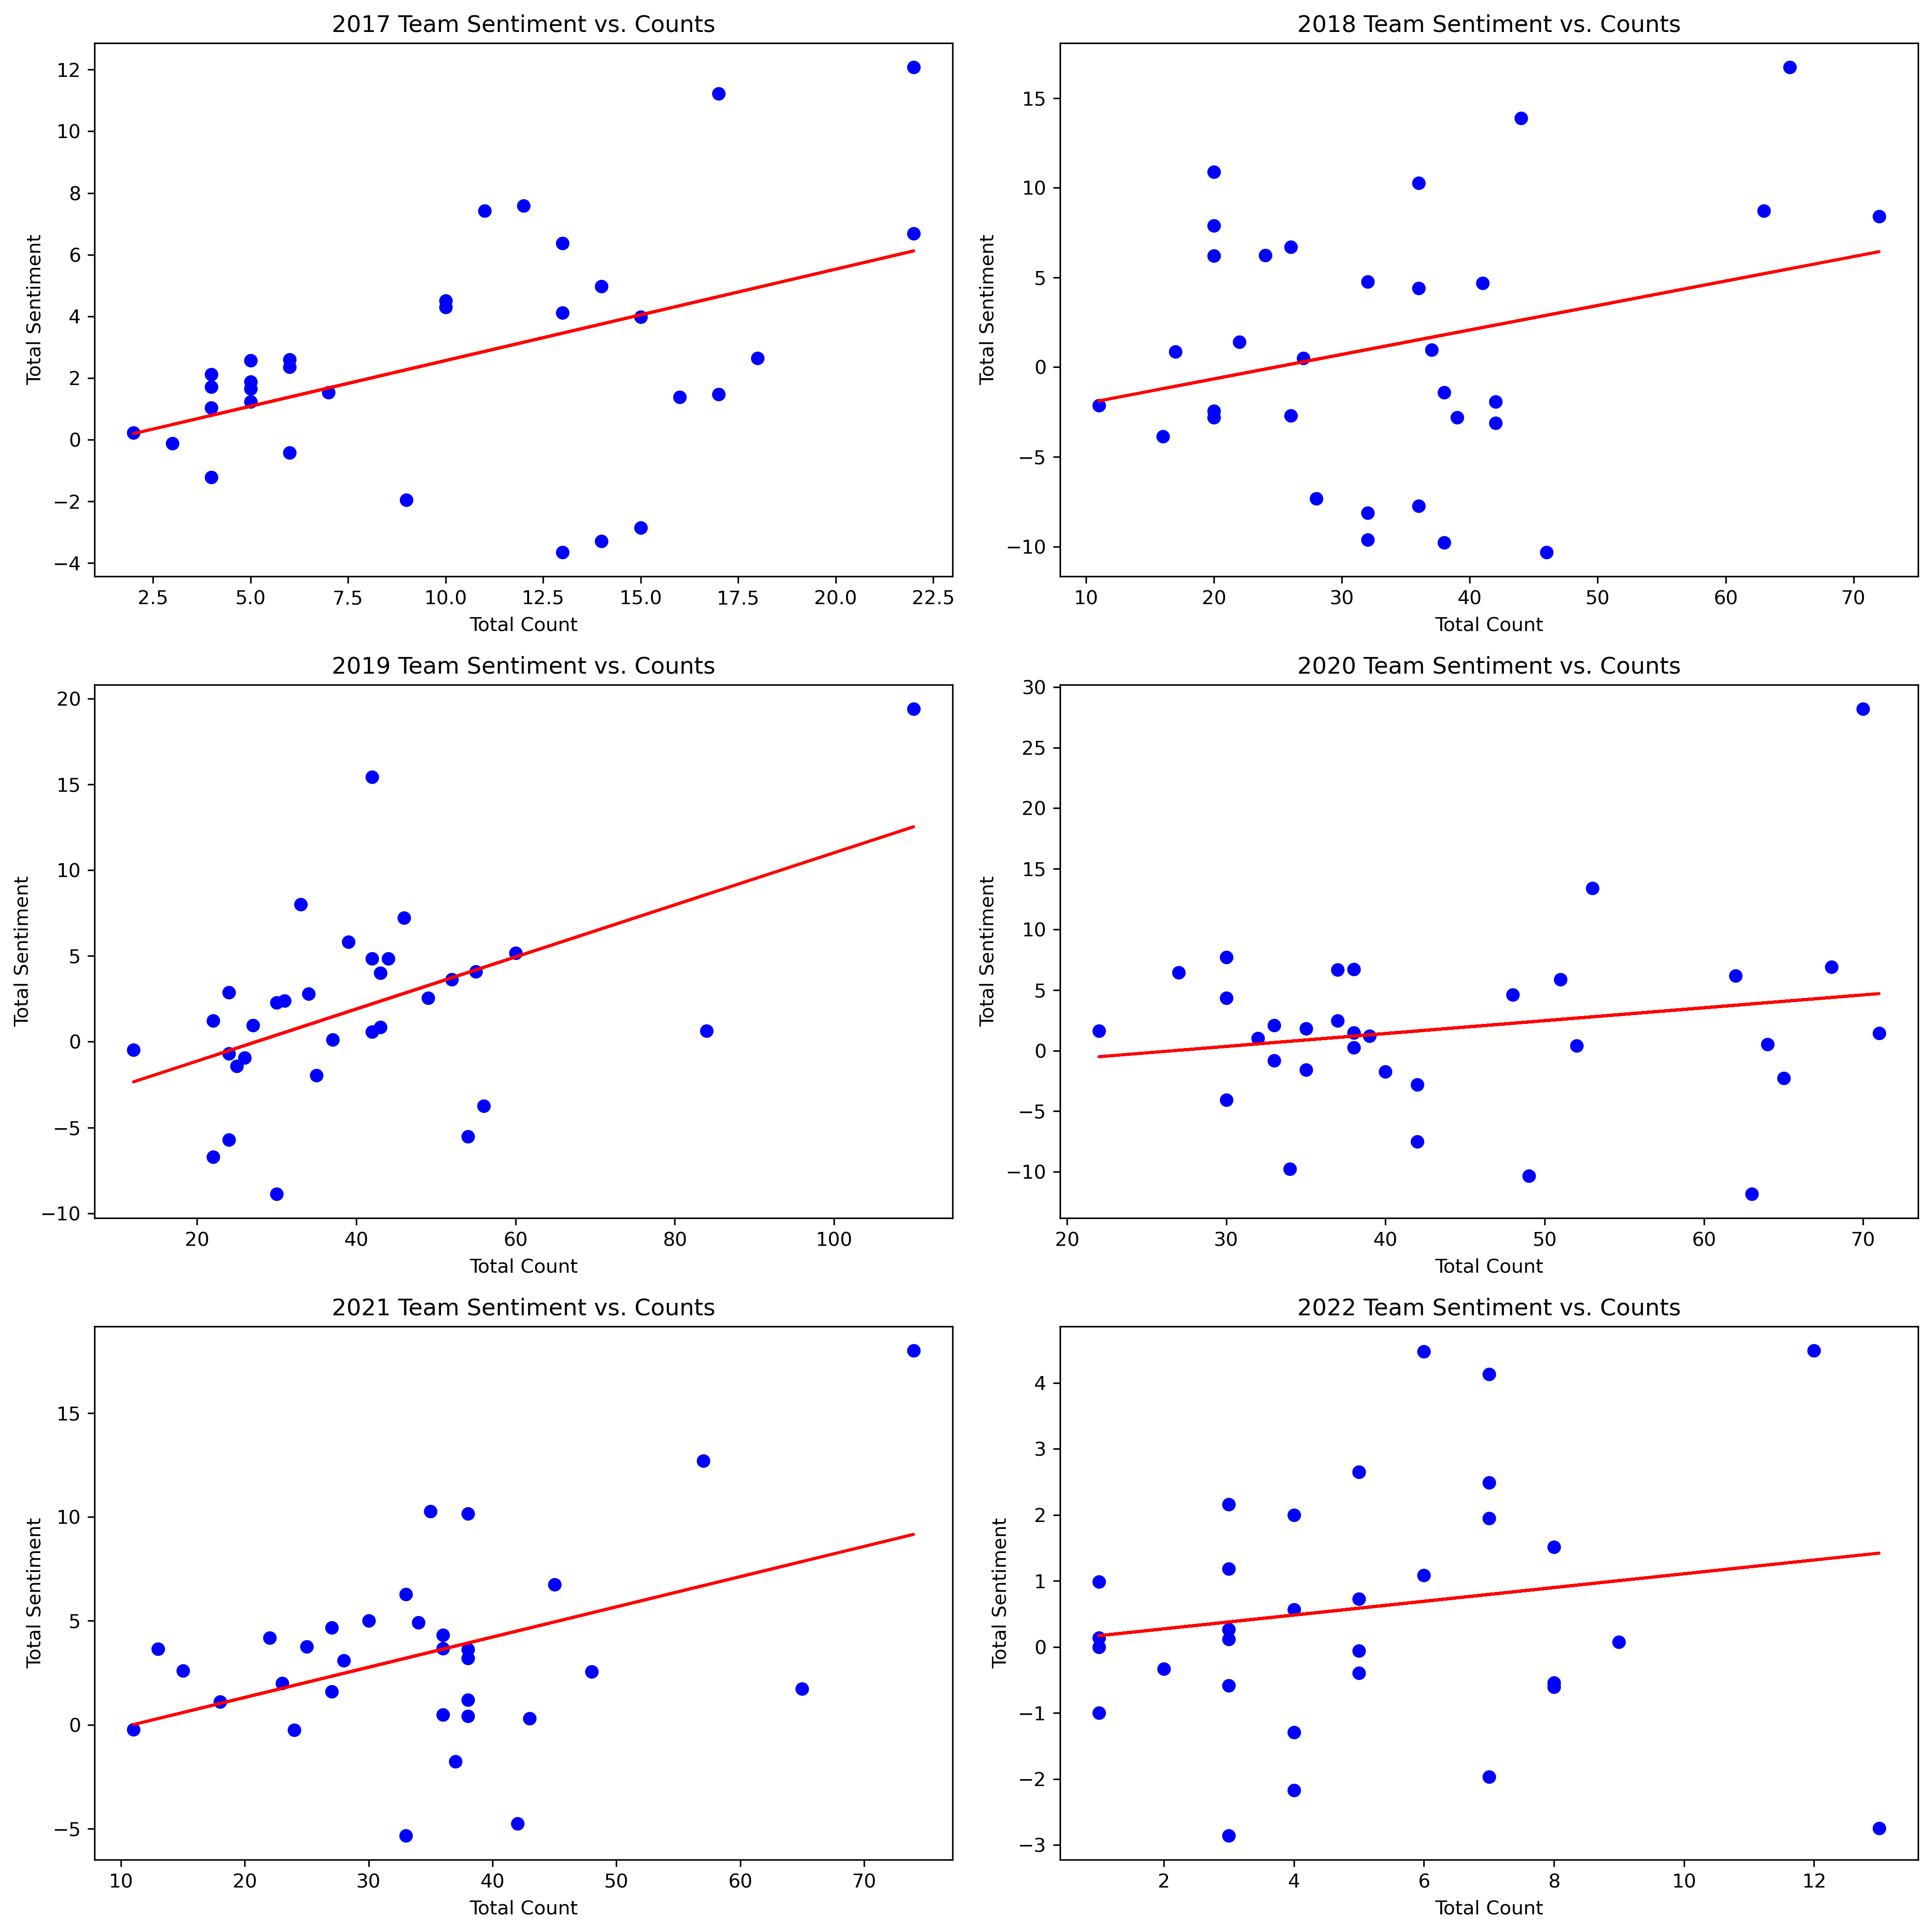

In [16]:
## linear regression analysis
fig, axs = plt.subplots(3, 2, figsize = (14,14), dpi = 300)

## 2017
axs[0,0].scatter(X, y, color = 'blue')
axs[0,0].plot(X, y_pred, color = 'red')
axs[0,0].set_title("2017 Team Sentiment vs. Counts")
axs[0,0].set_xlabel("Total Count")
axs[0,0].set_ylabel("Total Sentiment")

## 2018
axs[0,1].scatter(X1, y1, color = 'blue')
axs[0,1].plot(X1, y_pred1, color = 'red')
axs[0,1].set_title("2018 Team Sentiment vs. Counts")
axs[0,1].set_xlabel("Total Count")
axs[0,1].set_ylabel("Total Sentiment")

## 2019
axs[1,0].scatter(X2, y2, color = 'blue')
axs[1,0].plot(X2, y_pred2, color = 'red')
axs[1,0].set_title("2019 Team Sentiment vs. Counts")
axs[1,0].set_xlabel("Total Count")
axs[1,0].set_ylabel("Total Sentiment")

## 2020
axs[1,1].scatter(X3, y3, color = 'blue')
axs[1,1].plot(X3, y_pred3, color = 'red')
axs[1,1].set_title("2020 Team Sentiment vs. Counts")
axs[1,1].set_xlabel("Total Count")
axs[1,1].set_ylabel("Total Sentiment")

## 2021
axs[2,0].scatter(X4, y4, color = 'blue')
axs[2,0].plot(X4, y_pred4, color = 'red')
axs[2,0].set_title("2021 Team Sentiment vs. Counts")
axs[2,0].set_xlabel("Total Count")
axs[2,0].set_ylabel("Total Sentiment")

## 2022
axs[2,1].scatter(X5, y5, color = 'blue')
axs[2,1].plot(X5, y_pred5, color = 'red')
axs[2,1].set_title("2022 Team Sentiment vs. Counts")
axs[2,1].set_xlabel("Total Count")
axs[2,1].set_ylabel("Total Sentiment")

plt.tight_layout()

As you can see, there seems to be a positive relationship between the amount of times a team is mentioned and its total sentiment, but no definite conclusion can be given as you can see how variable and scattered the plots are. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap

In [18]:
sentiment = pd.read_csv("df_scored_9.csv")
odds_data = pd.read_csv("NFL_Odds_Data_2007-2022.csv")
NFLOdds= pd.read_csv('NFL_Odds_Data_2007-2022.csv',encoding= 'latin1',low_memory=False)
games_w_sentiment = pd.read_csv('condensed_df_sentiment.csv')
winpct_sent = pd.read_csv('winpct_sentiment_score_2021.csv')

In [19]:
#empty new column for yearlong average moneyline value
winpct_sent['avg_ml_2021'] = pd.Series(dtype=float)

winpct_sent.head(n=5)

Team  Year  Wins  Losses  total_games  Win_Percentage  \
0  Arizona Cardinals  2021    11       6           17       64.705882   
1    Atlanta Falcons  2021     7      10           17       41.176471   
2   Baltimore Ravens  2021     8       9           17       47.058824   
3      Buffalo Bills  2021    11       6           17       64.705882   
4  Carolina Panthers  2021     5      12           17       29.411765   

   total_score_sum  win_percentage  avg_ml_2021  
0         1.243966       64.705882          NaN  
1        -0.852680       41.176471          NaN  
2        -1.173183       47.058824          NaN  
3         1.696375       64.705882          NaN  
4        -3.318811       29.411765          NaN

posx and posy should be finite values
posx and posy should be finite values


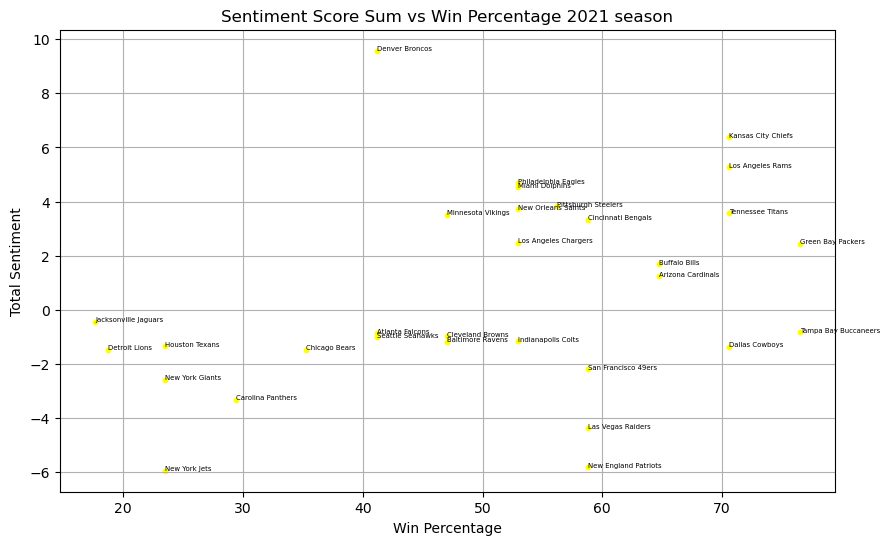

In [20]:


winpct_sent = winpct_sent.sort_values(by='win_percentage')

# Plotting winpct and sentiment score for a season (2021)
plt.figure(figsize=(10, 6))
plt.scatter(winpct_sent['win_percentage'], winpct_sent['total_score_sum'], color='yellow', s = 10)


for i in range(len(winpct_sent)):
    plt.text(winpct_sent['win_percentage'][i], winpct_sent['total_score_sum'][i], winpct_sent['Team'][i], fontsize = 5)

    

    
    
plt.title('Sentiment Score Sum vs Win Percentage 2021 season')
plt.xlabel('Win Percentage')
plt.ylabel('Total Sentiment')
plt.grid(True)
plt.show()

In [21]:
games_w_sentiment.head(n=5)

Unnamed: 0       Date                  Home                 Away  \
0        1247  1/30/2022    Kansas City Chiefs   Cincinnati Bengals   
1        1248  1/30/2022      Los Angeles Rams  San Francisco 49ers   
2        1245  1/23/2022    Kansas City Chiefs        Buffalo Bills   
3        1246  1/23/2022  Tampa Bay Buccaneers     Los Angeles Rams   
4        1243  1/22/2022     Green Bay Packers  San Francisco 49ers   

   Home_Score  Away_Score  Home_ML_AVG  Away_ML_AVG  sentiment_past_week_home  \
0          24          27     1.306290        3.700                 -0.640934   
1          20          17     1.562778        2.625                  0.939055   
2          42          36     1.740370        2.150                 -0.836742   
3          27          30     1.663333        2.300                  0.452804   
4          10          13     1.382308        3.175                  0.000000   

   sentiment_past_week_away  
0                  0.727999  
1                  1.002302  
2                  0.862375  
3                  0.987093  
4                 -1.356665

In [22]:
#calculate average moneyline value for each team in the 2021 season


# Filter games_w_sentiment for the 2021 season
games_w_sentiment['Date'] = pd.to_datetime(games_w_sentiment['Date']) # Ensure 'Date' column is in datetime format
filtered_games = games_w_sentiment[(games_w_sentiment['Date'] >= '2021-09-01') & (games_w_sentiment['Date'] <= '2022-02-28')]

# Initialize a dictionary to store running totals for each team
team_totals = {team: {'total_ml_avg': 0, 'num_games': 0} for team in winpct_sent['Team']}

# Iterate over each row in filtered_games and update running totals for home and away teams
for index, row in filtered_games.iterrows():
    home_team = row['Home']
    away_team = row['Away']
    if home_team in team_totals:
        team_totals[home_team]['total_ml_avg'] += row['Home_ML_AVG']
        team_totals[home_team]['num_games'] += 1
    if away_team in team_totals:
        team_totals[away_team]['total_ml_avg'] += row['Away_ML_AVG']
        team_totals[away_team]['num_games'] += 1

# Calculate average Home_ML_AVG for each team and update winpct_sent DataFrame
for index, row in winpct_sent.iterrows():
    team = row['Team']
    if team in team_totals:
        total_ml_avg = team_totals[team]['total_ml_avg']
        num_games = team_totals[team]['num_games']
        if num_games > 0:
            avg_ml_2021 = total_ml_avg / num_games
            winpct_sent.at[index, 'avg_ml_2021'] = avg_ml_2021
        else:
            winpct_sent.at[index, 'avg_ml_2021'] = None  # No games for the team in the specified date range

winpct_sent.head(n=32)

Team  Year  Wins  Losses  total_games  Win_Percentage  \
14   Jacksonville Jaguars  2021     3      14           17       17.647059   
10          Detroit Lions  2021     3      13           16       18.750000   
23        New York Giants  2021     4      13           17       23.529412   
24          New York Jets  2021     4      13           17       23.529412   
12         Houston Texans  2021     4      13           17       23.529412   
4       Carolina Panthers  2021     5      12           17       29.411765   
5           Chicago Bears  2021     6      11           17       35.294118   
9          Denver Broncos  2021     7      10           17       41.176471   
31  Washington Commanders  2021     7      10           17       41.176471   
28       Seattle Seahawks  2021     7      10           17       41.176471   
1         Atlanta Falcons  2021     7      10           17       41.176471   
7        Cleveland Browns  2021     8       9           17       47.058824   
2        Baltimore Ravens  2021     8       9           17       47.058824   
20      Minnesota Vikings  2021     8       9           17       47.058824   
22     New Orleans Saints  2021     9       8           17       52.941176   
13     Indianapolis Colts  2021     9       8           17       52.941176   
25    Philadelphia Eagles  2021     9       8           17       52.941176   
17   Los Angeles Chargers  2021     9       8           17       52.941176   
19         Miami Dolphins  2021     9       8           17       52.941176   
26    Pittsburgh Steelers  2021     9       7           16       56.250000   
6      Cincinnati Bengals  2021    10       7           17       58.823529   
16      Las Vegas Raiders  2021    10       7           17       58.823529   
21   New England Patriots  2021    10       7           17       58.823529   
27    San Francisco 49ers  2021    10       7           17       58.823529   
0       Arizona Cardinals  2021    11       6           17       64.705882   
3           Buffalo Bills  2021    11       6           17       64.705882   
30       Tennessee Titans  2021    12       5           17       70.588235   
8          Dallas Cowboys  2021    12       5           17       70.588235   
18       Los Angeles Rams  2021    12       5           17       70.588235   
15     Kansas City Chiefs  2021    12       5           17       70.588235   
11      Green Bay Packers  2021    13       4           17       76.470588   
29   Tampa Bay Buccaneers  2021    13       4           17       76.470588   

    total_score_sum  win_percentage  avg_ml_2021  
14        -0.436954       17.647059     4.269464  
10        -1.476198       18.750000     4.232353  
23        -2.576096       23.529412     3.552843  
24        -5.939916       23.529412     4.227523  
12        -1.346115       23.529412     5.487549  
4         -3.318811       29.411765     2.781404  
5         -1.469581       35.294118     3.206310  
9          9.573930       41.176471     2.378033  
31              NaN       41.176471          NaN  
28        -1.018890       41.176471     2.084053  
1         -0.852680       41.176471     3.247986  
7         -0.975996       47.058824     1.974171  
2         -1.173183       47.058824     2.048730  
20         3.516881       47.058824     2.238156  
22         3.717359       52.941176     2.212146  
13        -1.157589       52.941176     2.080495  
25         4.677803       52.941176     2.217845  
17         2.479254       52.941176     1.804195  
19         4.525686       52.941176     2.869113  
26         3.827516       56.250000     2.602883  
6          3.327511       58.823529     2.119140  
16        -4.361012       58.823529     2.527811  
21        -5.806477       58.823529     1.852033  
27        -2.191997       58.823529     1.889378  
0          1.243966       64.705882     1.879692  
3          1.696375       64.705882     1.462154  
30         3.574503       70.588235     2.097894  
8         -1.35901

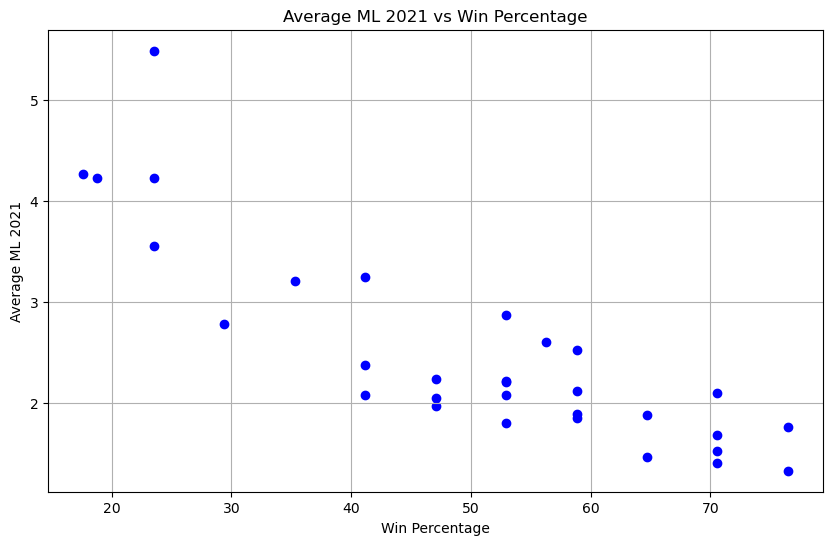

In [23]:



# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(winpct_sent['Win_Percentage'], winpct_sent['avg_ml_2021'], color='blue')

# # Adding team names as labels
# for i in range(len(winpct_sent)):
#     plt.text(winpct_sent['Win_Percentage'][i], winpct_sent['avg_ml_2021'][i], winpct_sent['Team'][i], fontsize=8)

plt.title('Average ML 2021 vs Win Percentage')
plt.xlabel('Win Percentage')
plt.ylabel('Average ML 2021')
plt.grid(True)
plt.show()

In [24]:
winpct_sent = winpct_sent.sort_values(by='win_percentage')
winpct_sent = winpct_sent[winpct_sent['Team'] != 'Washington Commanders']


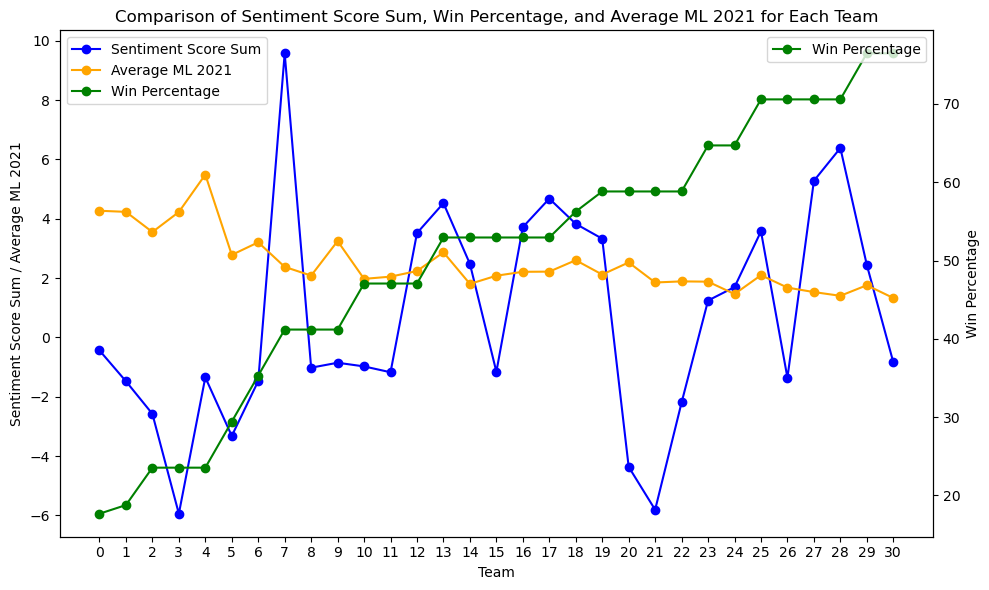

In [25]:
#plot showing relationship between sentiment score, average moneyline value and win percentage for each team in a year



fig, ax1 = plt.subplots(figsize=(10, 6))

index = np.arange(len(winpct_sent))

line1 = ax1.plot(index, winpct_sent['total_score_sum'], marker='o', label='Sentiment Score Sum', color='blue')
line2 = ax1.plot(index, winpct_sent['avg_ml_2021'], marker='o', label='Average ML 2021', color='orange')

# Create a secondary y-axis for Win Percentage
ax2 = ax1.twinx()
line3 = ax2.plot(index, winpct_sent['Win_Percentage'], marker='o', label='Win Percentage', color='green')

ax1.set_xlabel('Team')
ax1.set_ylabel('Sentiment Score Sum / Average ML 2021')
ax2.set_ylabel('Win Percentage')
ax1.set_title('Comparison of Sentiment Score Sum, Win Percentage, and Average ML 2021 for Each Team')
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticks(index)
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()


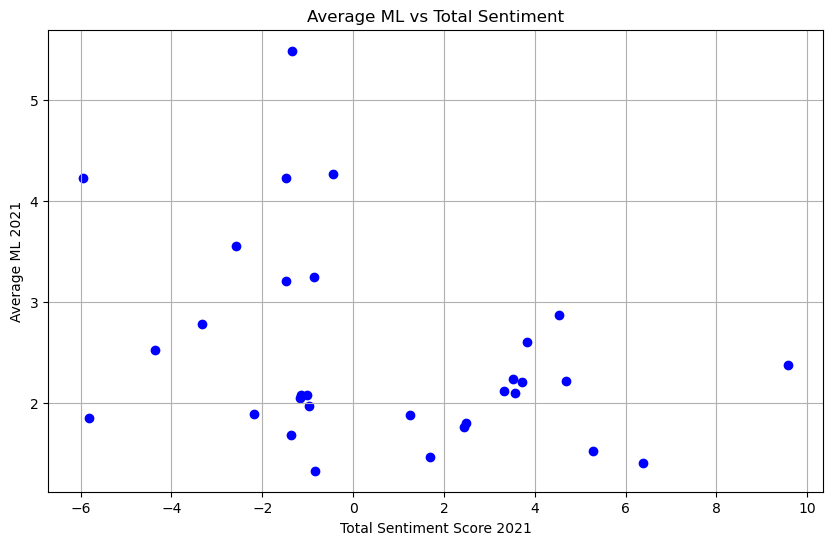

In [26]:
#plotting average moneyline value and average total sentiment for the 2021 season

plt.figure(figsize=(10, 6))
plt.scatter(winpct_sent['total_score_sum'], winpct_sent['avg_ml_2021'], color='blue')

# # Adding team names as labels
# for i in range(len(winpct_sent)):
#     plt.text(winpct_sent['Win_Percentage'][i], winpct_sent['avg_ml_2021'][i], winpct_sent['Team'][i], fontsize=8)

plt.title('Average ML vs Total Sentiment')
plt.xlabel('Total Sentiment Score 2021')
plt.ylabel('Average ML 2021')
plt.grid(True)
plt.show()

# Plots for Home and Away moneylines
Below the NFL odds data was condensed down from 2007-2022 to 2017-2022. As out headlines data was also from 2017-2022. New data was saved as filtered_df and a new csv file was created for the 2017-2022 data. The Date column was also transformed into a more suitable format for analysis  as well.

In [27]:
NFLOdds= pd.read_csv('NFL_Odds_Data_2007-2022.csv',encoding= 'latin1',low_memory=False)
NFLOdds['Date']= pd.to_datetime(NFLOdds['Date'])

start_date= '2017-08-20'
end_date= '2022-02-13'
mask= (NFLOdds['Date']>=start_date)&(NFLOdds['Date']<=end_date)
filtered_df= NFLOdds.loc[mask]
filtered_df.to_csv('New_NFL_Odds_Data_2017-2022.csv', index=False)

Below some data cleaning took place as the data had some outliers in error like having 4 digits in the Moneyline_away and Moneyline_home columns so both columns were reduced to only have 3 digits. As money lines are normally 3 digits.

In [28]:
filtered_df['Moneyline_away']= filtered_df['Moneyline_away'].apply(lambda x: x//10 if abs(x)> 999 else x)
filtered_df['Moneyline_home']= filtered_df['Moneyline_home'].apply(lambda x: x//10 if abs(x)> 999 else x)

Below two histograms were created one for home team money line and one for away team money line so we could see at what frequency the money line is set more commonly between 2017-2022 for home and away. It was found that money line is never set at zero for home or away teams. As well as the frequency for positive money lines for home teams is greater while the frequency for negative money lines for away teams is greater. So, meaning the away team is expected to get a win over the home team which is a little intersting to see.

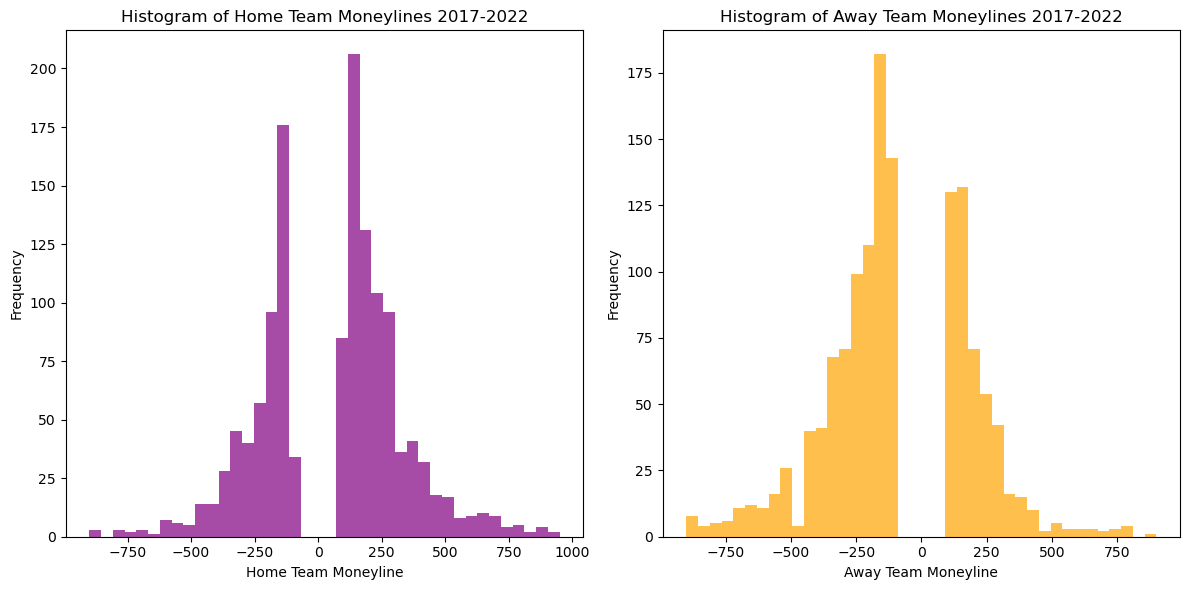

In [29]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.hist(filtered_df['Moneyline_home'],bins= 40,color= 'purple',alpha= 0.7)
plt.title('Histogram of Home Team Moneylines 2017-2022')
plt.xlabel('Home Team Moneyline')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(filtered_df['Moneyline_away'], bins= 40,color= 'orange',alpha=0.7)
plt.title('Histogram of Away Team Moneylines 2017-2022')
plt.xlabel('Away Team Moneyline')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Below the average money line for home and away teams was calculated. It’s a bit interesting to see that according to money lines the away team is expected to win on average with its average being negative and the home teams average being positive.

In [30]:
Moneyline_homeAvg= filtered_df['Moneyline_home'].mean()
Moneyline_awayAvg= filtered_df['Moneyline_away'].mean()

print(f"Average Moneyline for Home Teams 2017-2022: {Moneyline_homeAvg}")
print(f"Average Moneyline for Away Teams 2017-2022: {Moneyline_awayAvg}")

Average Moneyline for Home Teams 2017-2022: 60.246119733924616
Average Moneyline for Away Teams 2017-2022: -95.17738359201773


Below a boxplot was created for money lines for home teams and away teams. This was interesting to see as the median money line for away teams was negative and for home teams it was positive. We also had some outliers for both home and away teams where the money line was a bit higher or lower than normal. So essentially what we are seeing is away teams are expected to win based on the money lines set and the home team is expected to lose. As negative money lines mean a team is expected to win and a positive money line means a team is expected to lose.

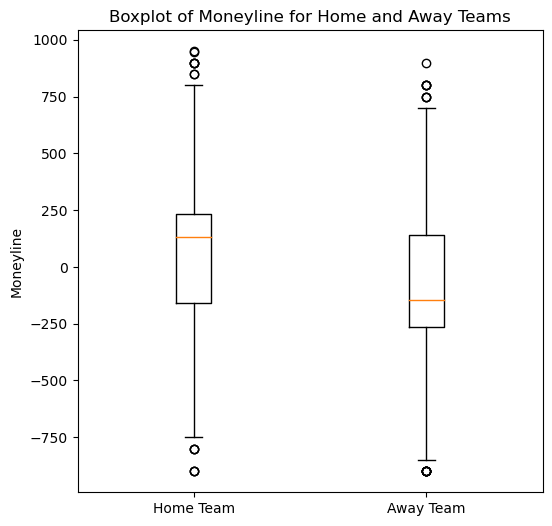

In [31]:
plt.figure(figsize= (6,6))
plt.boxplot([filtered_df['Moneyline_home'],filtered_df['Moneyline_away']],labels= ['Home Team','Away Team'])
plt.title('Boxplot of Moneyline for Home and Away Teams')
plt.ylabel('Moneyline')
plt.show()

Below a time, series plot was created just to see how money lines for home and away teams have changed over time. So, between 2017 and 2022 we have had 5 seasons played so you can see the 5 distinctive groups with the breaks being the off seasons when no games are played so you just have a single line for away and home showing. But back in 2017 you can see the money line being positive for home teams more often and negative for away teams but as the years progress, we see more of a split with home and away teams sharing negative and positive money lines more often. So, we are seeing more often home teams being expected to win as the years progress rather then back in 2017 when aways teams were expected to win according to money lines.

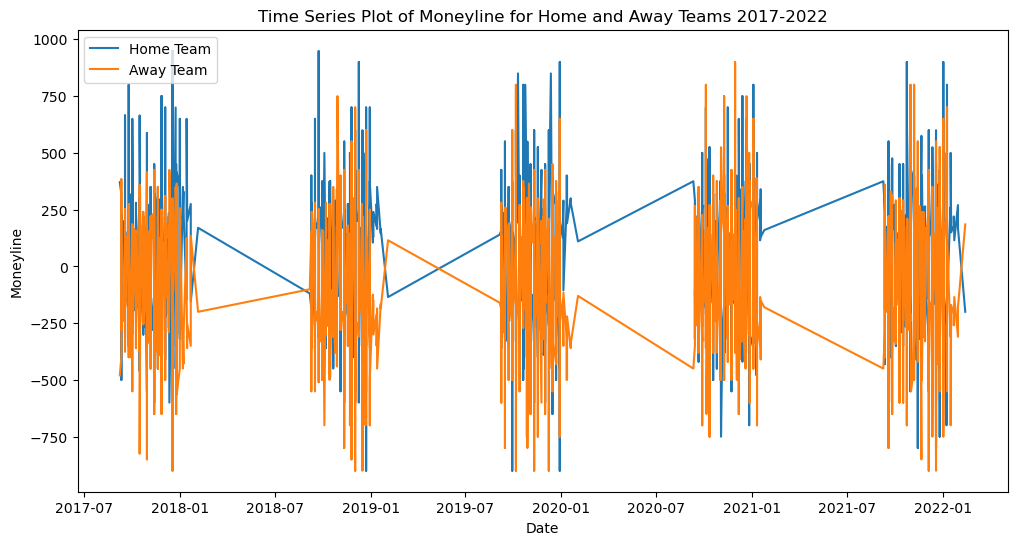

In [32]:
filtered_df.set_index('Date',inplace= True)
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Moneyline_home'],label= 'Home Team')
plt.plot(filtered_df['Moneyline_away'],label= 'Away Team')
plt.xlabel('Date')
plt.ylabel('Moneyline')
plt.title('Time Series Plot of Moneyline for Home and Away Teams 2017-2022')
plt.legend()
plt.show()